In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\shaki\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [2]:
#The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:
mnist = tf.keras.datasets.fashion_mnist


In [52]:
#Calling load_data on this object will give you two sets of two lists, these will be the training and testing 
#values for the graphics that contain the clothing items and their labels.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

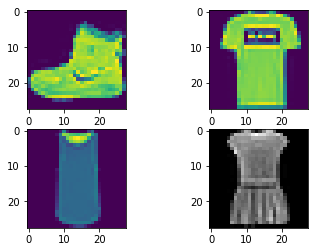

In [60]:
import matplotlib.pyplot as plt
plt.imshow(training_images[32]) 

plt.subplot(221)
plt.imshow(training_images[0])
plt.subplot(222)
plt.imshow(training_images[1])
plt.subplot(223)
plt.imshow(training_images[2])
plt.subplot(224)
plt.imshow(training_images[3], cmap=plt.get_cmap('gray'))

#print(training_labels[0])
#print(training_images[0])
plt.show()

In [5]:
#all of the values in the number are between 0 and 255. If we are training a 
#neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'

training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


# Train
it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [7]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4975 - acc: 0.8253
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3766 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3385 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3156 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2973 - acc: 0.8902s - loss: 0.2975 - acc: 0.89
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2829 - acc: 0.8955
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2698 - acc: 0.9010
Epoch 8/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2597 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 6s 92us/sample - loss: 

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3288 - acc: 0.8864


[0.3288214610338211, 0.8864]

In [43]:
classifications = model.predict(test_images)

print(classifications[0])

[1.7627514e-07 8.3984153e-10 1.6612592e-08 8.8090140e-08 2.8508056e-08
 4.1469552e-02 1.2272428e-06 4.8193675e-02 1.4367386e-07 9.1033512e-01]


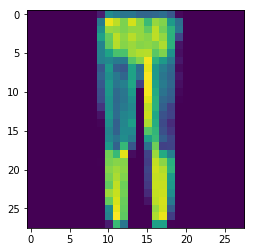

In [56]:
import matplotlib.pyplot as plt
plt.imshow(test_images[3]) 
#print(training_labels[0])
#print(training_images[0])
plt.show()

In [57]:
print(test_labels[3])

1
